In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('noisy_sample_dataset.csv')

### Handling Missing Values

In [6]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0) # Assuming that this is their first order
df['aisle_category'] = df['aisle_category'].fillna(df['aisle_category'].mode()[0]) # imputing with most frequent aisle category
df['department'] = df['department'].fillna(df['department'].mode()[0]) # imputing with most frequent department category

In [7]:
# export the cleaned data
df.to_csv('data.csv', index=False)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81086 entries, 0 to 81085
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                81086 non-null  int64  
 1   product_id              81086 non-null  int64  
 2   add_to_cart_order       81086 non-null  int64  
 3   reordered               81086 non-null  int64  
 4   user_id                 81086 non-null  int64  
 5   eval_set                81086 non-null  object 
 6   order_number            81086 non-null  int64  
 7   order_dow               81086 non-null  int64  
 8   order_hour_of_day       81086 non-null  object 
 9   days_since_prior_order  81086 non-null  float64
 10  product_name            81086 non-null  object 
 11  aisle_id                81086 non-null  int64  
 12  department_id           81086 non-null  int64  
 13  aisle                   81086 non-null  object 
 14  aisle_category          81086 non-null

### PRE-PROCESSING

In [18]:
# copy the data
df_copy = df.copy()

In [19]:
df_copy.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
aisle_category            0
department                0
dtype: int64

In [20]:
df_copy.nunique()

order_id                  27066
product_id                14611
add_to_cart_order            71
reordered                     2
user_id                   54630
eval_set                      1
order_number                 99
order_dow                     7
order_hour_of_day            57
days_since_prior_order       61
product_name              14611
aisle_id                    134
department_id                21
aisle                       134
aisle_category                7
department                   22
dtype: int64

In [21]:
df_copy = df_copy.drop(columns=['eval_set','department_id','user_id','product_id'])

In [22]:
df_copy['order_hour_of_day'] = pd.to_numeric(df_copy['order_hour_of_day'], errors='coerce')

In [23]:
numerical_values = df_copy.select_dtypes(include=['int64','float64'])
numerical_values

,order_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id
0,133873,3,1,18,6,18.0,16.0,61
1,133874,2,0,3,0,11.0,3.0,88
2,133875,13,1,18,0,13.0,7.0,78
3,133875,2,0,6,0,13.0,6.0,16
4,133875,4,0,9,5,14.0,3.0,108
...,...,...,...,...,...,...,...,...
81081,160937,7,1,11,3,0.0,14.0,24
81082,160937,6,1,2,1,13.0,7.0,123
81083,160937,3,1,4,5,19.0,11.0,116
81084,160937,17,0,21,2,10.0,1.0,4


In [24]:
categorical_values = df_copy.select_dtypes(include=['object'])
categorical_values

,product_name,aisle,aisle_category,department
0,Almond Cake,cookies cakes,Packaged Foods,snacks
1,Natural Honey Peanut Butter,spreads,Other,pantry
2,Whole Grain Sesame Rye Crisp Bread,crackers,Packaged Foods,snacks
3,Organic Cilantro,fresh herbs,Fresh Foods,produce
4,Part Skim Ricotta Cheese,other creams cheeses,Unknown,dairy eggs
...,...,...,...,...
81081,Organic Strawberries,fresh fruits,Fresh Foods,produce
81082,Stringless Sugar Snap Peas,packaged vegetables fruits,Packaged Foods,produce
81083,Berry Medley,frozen produce,Frozen & Refrigerated Items,frozen
81084,Yakisoba Chicken Flavor Noodles,instant foods,Packaged Foods,dry goods pasta


In [25]:
from sklearn.preprocessing import LabelEncoder
# label encoding aisle_category and department
le = LabelEncoder()
categorical_values['aisle_category'] = le.fit_transform(categorical_values['aisle_category'])
categorical_values['department'] = le.fit_transform(categorical_values['department'])

In [26]:
aisle_enc = pd.get_dummies(categorical_values['aisle'], prefix='aisle', drop_first=True)

In [27]:
# product_name has too many values , so frequency encoding suits best
categorical_values['product_name_freq_enc'] = categorical_values['product_name'].map(categorical_values['product_name'].value_counts())

# we are dropping the original product_name
categorical_values = categorical_values.drop(columns=['product_name'])

In [28]:
# droping the aisle as we have aisle_enc
categorical_values = categorical_values.drop(columns=['aisle'])

# here we are concatenating all the encoded columns
categorical_values_enc = pd.concat([categorical_values, aisle_enc], axis=1)
categorical_values_enc

,aisle_category,department,product_name_freq_enc,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,5,21,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,17,2,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,5,21,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,20,196,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,8,15,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,1,20,701,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81082,5,20,15,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81083,2,11,35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81084,5,10,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# convertign the df into sparseformat
categorical_values_enc_sparsed = categorical_values_enc.astype(pd.SparseDtype("int", fill_value=0))

# checking teh results
categorical_values_enc_sparsed.head()


,aisle_category,department,product_name_freq_enc,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,5,21,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,17,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5,21,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,20,196,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# aliginign the index
categorical_values_enc_sparsed.reset_index(drop=True, inplace=True)
numerical_values.reset_index(drop=True, inplace=True)

In [31]:
# numerical and catergorical values concatinantion
cat_num_merged = pd.concat([categorical_values_enc_sparsed, numerical_values], axis=1)

### VISUALIZATIONS

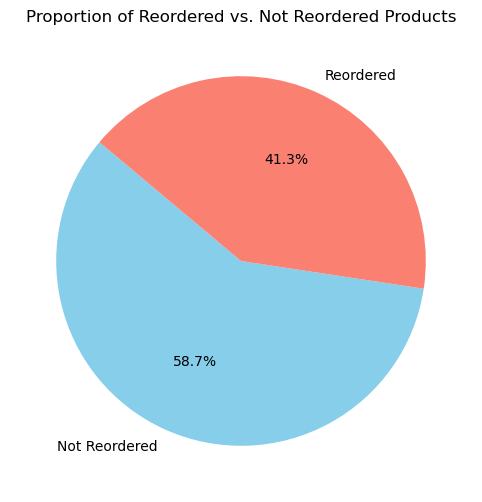

In [15]:
# Calculate proportions
reordered_counts = df['reordered'].value_counts()
reordered_labels = ['Not Reordered', 'Reordered']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    reordered_counts,
    labels=reordered_labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate for better view
    colors=['skyblue', 'salmon']  # Distinct colors
)
plt.title('Proportion of Reordered vs. Not Reordered Products')
plt.show()

The  not reorder percentage is greater than the reordered, it means that the majority of products are purchased only once, maybe because are less essential for the customers

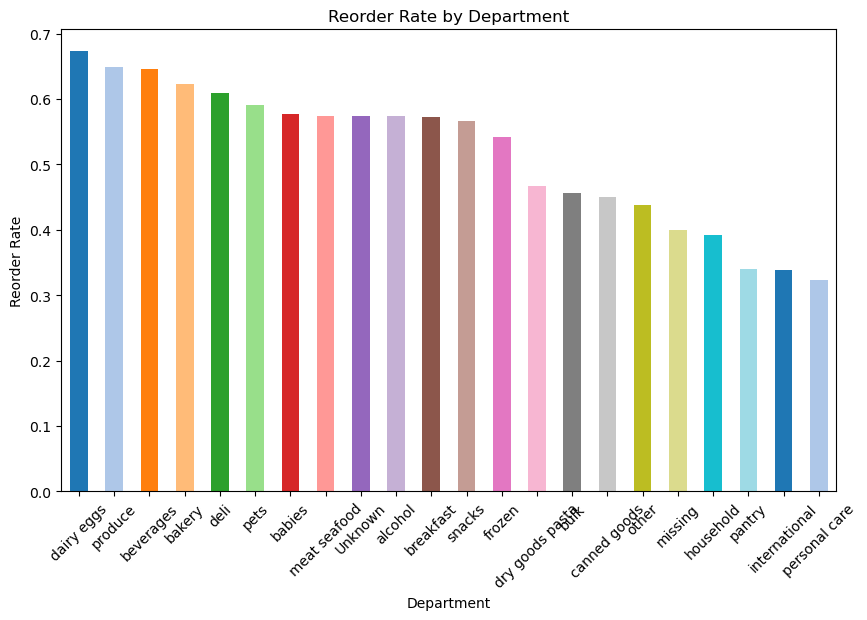

In [16]:
# Aggregate reorder rates by department with observed=True
dept_reorder = (
    df.groupby('department', observed=True)['reordered']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
dept_reorder.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45)
plt.show()

We can see that "Dairy & Eggs" are a basic prod in the households and have the highest reorder rate

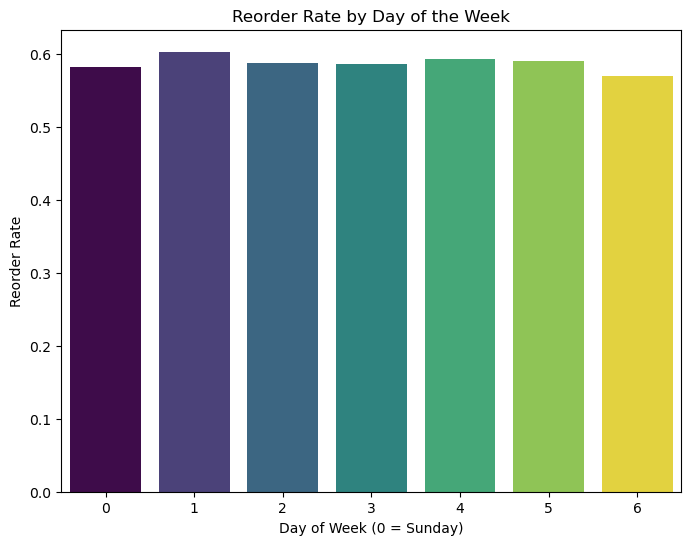

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='order_dow',
    y='reordered',
    data=df,
    errorbar=None, 
    hue='order_dow',  
    palette='viridis',
    dodge=False 
)

plt.title('Reorder Rate by Day of the Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Reorder Rate')


plt.legend([], [], frameon=False)

plt.show()

The day 1 is the one with the highest reorder rate, so is more likely the customers reorder product on Monday, maybe that means the customer trend to restocking groceries after the weekend, preparing for the week ahead. Marketing emails will be very effective on Sunday night, helping the sells the next day. 

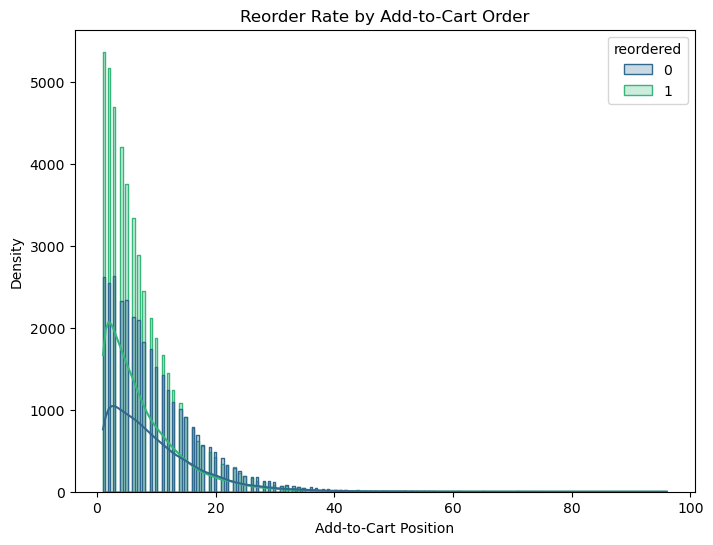

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='add_to_cart_order', hue='reordered', kde=True, element="step", palette='viridis')
plt.title('Reorder Rate by Add-to-Cart Order')
plt.xlabel('Add-to-Cart Position')
plt.ylabel('Density')
plt.show()

This plot shows that reorder a product is more likely on the first products added to the cart, that means the customers prioritize more regular purchased items because are part of their routines

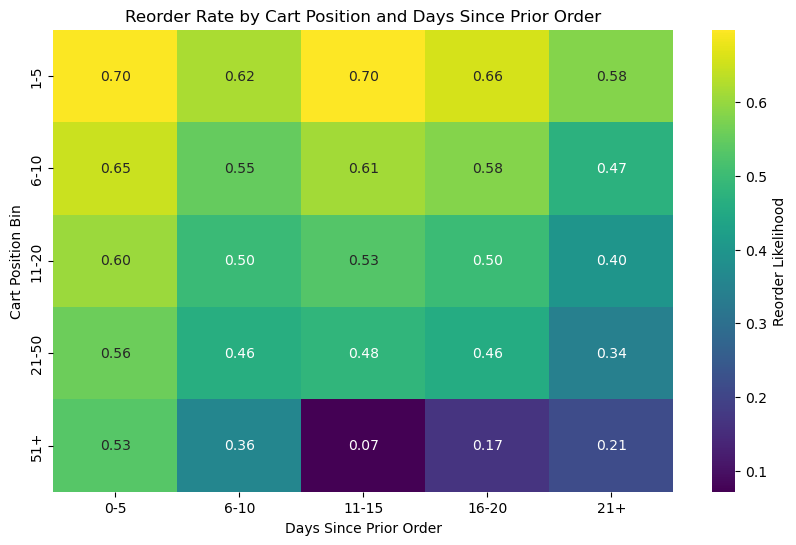

In [19]:
# Bin `add_to_cart_order` and `days_since_prior_order`
df['cart_bin'] = pd.cut(df['add_to_cart_order'], bins=[0, 5, 10, 20, 50, 100], labels=['1-5', '6-10', '11-20', '21-50', '51+'])
df['days_bin'] = pd.cut(df['days_since_prior_order'], bins=[0, 5, 10, 15, 20, 30], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Pivot table with observed=True to avoid FutureWarning
heatmap_data = df.pivot_table(index='cart_bin', columns='days_bin', values='reordered', aggfunc='mean', observed=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Reorder Likelihood'})
plt.title('Reorder Rate by Cart Position and Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Cart Position Bin')
plt.show()

with this heatmap for bins of cart position and days since prior order we can analyze that the products added first to the cart are reorder more quickly, that identify a pattern or essential products that needs to be replaced frequently 

### ASSOCIATION RULES

In [22]:
# association rule mining
basket_data = df[['order_id', 'aisle_category']]

We try to analyze which aisle category are frequently purchased together in the cart transactions

In [23]:
basket_data = basket_data.drop_duplicates()
basket_data = basket_data[basket_data['aisle_category'] != 'Unknown']


In [24]:
# Create a pivot table
basket = basket_data.pivot_table(index='order_id', columns='aisle_category', aggfunc='size', fill_value=0)


In [25]:
# Convert quantities to 1 and 0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

/var/folders/8b/gvyhprgn3t764q19dkq1gt2c0000gp/T/ipykernel_95872/3603850989.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [26]:
from mlxtend.frequent_patterns import apriori

basket_bool = basket.astype(bool)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_bool, min_support=0.005, use_colnames=True)



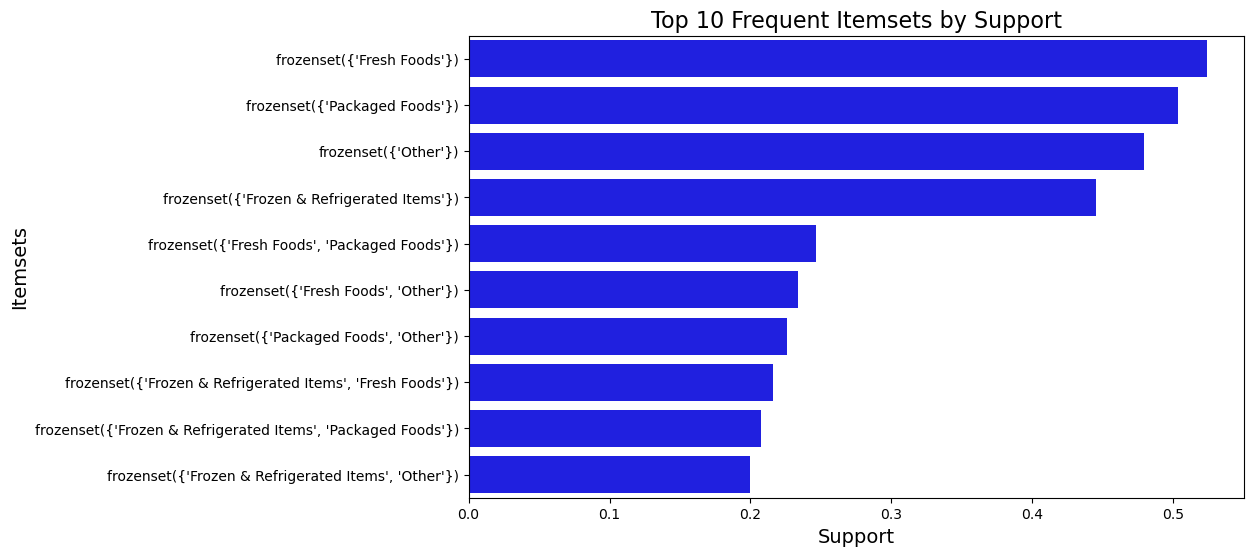

In [27]:
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_frequent_itemsets, color='blue') 
plt.title('Top 10 Frequent Itemsets by Support', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.show()


Generating frequent itemsets we analyze that Fresh Foods has the highest support, 51.86% of all transactions contain items from the "Fresh Foods" aisle category, this one is a highly purchased category ans is present in more than the half of all transactions

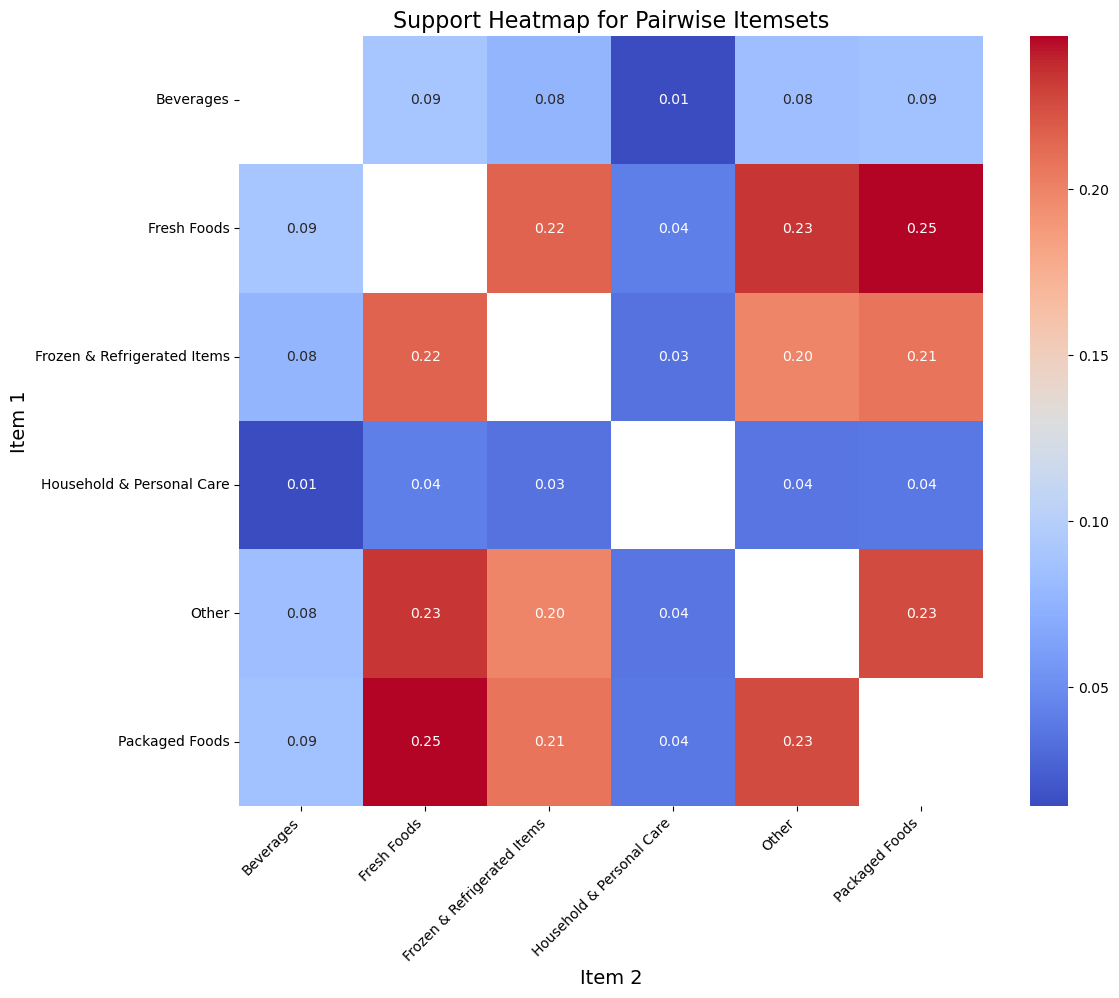

In [28]:
# Extract multi-item itemsets for visualization
multi_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

if not multi_itemsets.empty:
    # Create a pivot table for heatmap
    pairwise_itemsets = [
        (list(row['itemsets'])[0], list(row['itemsets'])[1], row['support'])
        for _, row in multi_itemsets.iterrows() if len(row['itemsets']) == 2
    ]
    
    if pairwise_itemsets:
        # Create the pivot table
        itemsets_pivot = pd.DataFrame(pairwise_itemsets, columns=['Item 1', 'Item 2', 'Support'])
        symmetric_pivot = itemsets_pivot.pivot(index='Item 1', columns='Item 2', values='Support')

        # Ensure symmetry
        symmetric_pivot = symmetric_pivot.combine_first(symmetric_pivot.T)

        # Plot heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(symmetric_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title('Support Heatmap for Pairwise Itemsets', fontsize=16)
        plt.xlabel('Item 2', fontsize=14)
        plt.ylabel('Item 1', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.show()
    else:
        print("No pairwise itemsets found for visualization.")
else:
    print("No multi-item itemsets found for visualization.")




for the pairwise correlation plot of the itemsets we identify a strong relation between two categories packaged foods and fresh food,  indicate that the customers buy fresh food and complement the purchased with packaged snacks. Similar relation between fresh food and frozen & refrigerated.

In [29]:
#export to csv
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

In [30]:
# count of unique order_id in the dataset
order_count = df['order_id'].nunique()
order_count

27066

In [52]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.935, num_itemsets=27066)


(bread) -> (butter)

antecedent(trigger) -> consequent

Confidence: how often the item (Consequent) result from the antecedent


Lift: how likely the consequent occur when antecedent is present, lift > 1 positive association


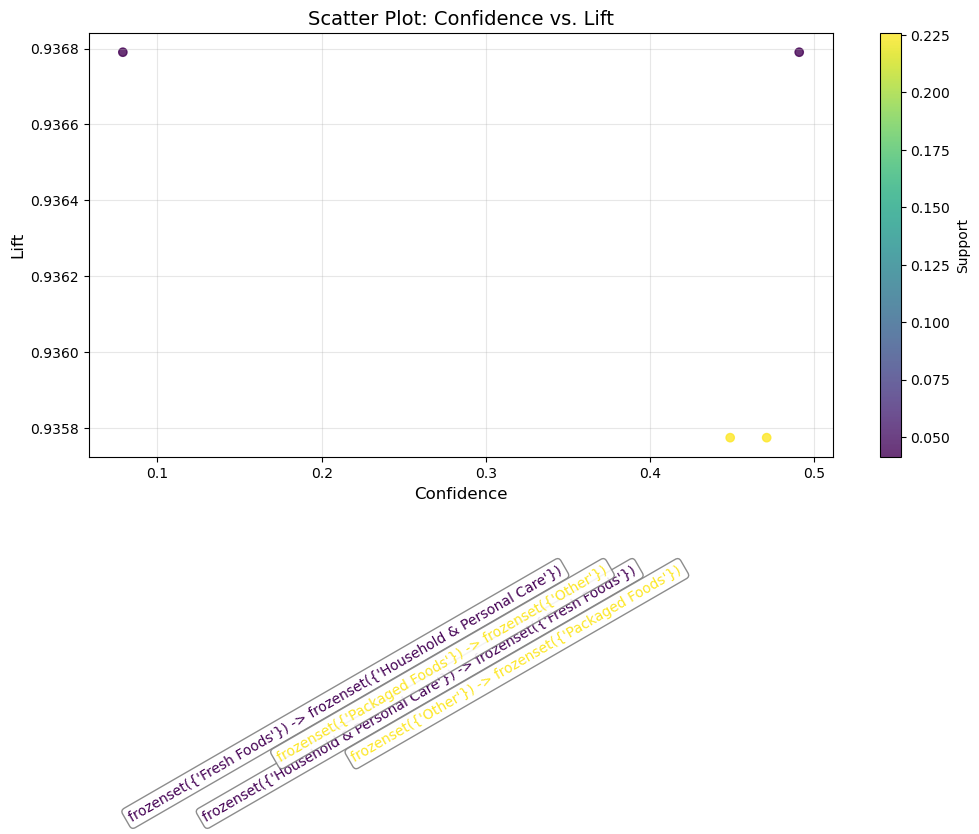

In [49]:
# Scatter Plot: Confidence vs. Lift
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rules['confidence'],
    rules['lift'],
    c=rules['support'],
    cmap='viridis',
    alpha=0.8
)
plt.colorbar(scatter, label='Support')
plt.title('Scatter Plot: Confidence vs. Lift', fontsize=14)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Lift', fontsize=12)
plt.grid(alpha=0.3)

labels = [f"{rules['antecedents'][i]} -> {rules['consequents'][i]}" for i in range(len(rules))]
colors = scatter.to_rgba(rules['support'])  

plt.subplots_adjust(bottom=0.35) 
for i, label in enumerate(labels):
    plt.text(
        0.05 + i * 0.1,  
        -0.25, 
        label,
        color=colors[i],
        fontsize=10,
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.9),
        rotation=30,  
        ha='left',
        va='top'
    )

plt.show()




base on the association rules, we can see that "fresh & food" (Antecedent)  and "household & personal care" (Consequent) has a high lift and confidence, so is very likely that when a customer buy "fresh & food" get a "household & personal care" product, so combine both kind of categories is good for a marketing campaign.

In [50]:
# Export to csv
rules.to_csv('association_rules.csv', index=False)